# PoS tagging using HMMs and the Viterbi algorithm

This notebook serves as a showcase of the PoS tagger implemented using Viterbi's algorithm. 

In [1]:
from HMM import HMM

import numpy as np
from sklearn.metrics import f1_score
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## First predictions in Basque and Spanish

Let's start by making our first predictions with examples in Basque and Spanish, the two languages that were chosen for this exercise. For both cases, the same procedure is followed. We first declare an object of the HMM class with a given name (we use this variable to distinguish languages). Then, we load the .conllu file with the training data, and train the model in the corresponding language. Afterwards, we can make predictions. Each prediction returns two values, the obtained tags after applying Viterbi, and the logarithmic probability of this prediction.

In [2]:
basque_hmm = HMM("EUS")

print("Training the model: ", basque_hmm.name)
basque_hmm.train("UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_sentence = "Nire etxea oso handia da"
print("Tagging the sentence: ", basque_sentence)
basque_tags, basque_log_prob = basque_hmm.pos_tagging(basque_sentence)
print("POS: ", basque_tags)
print("Log probability: ", basque_log_prob)

Training the model:  EUS
Tagging the sentence:  Nire etxea oso handia da
POS:  [('nire', 'PRON'), ('etxea', 'NOUN'), ('oso', 'ADV'), ('handia', 'ADJ'), ('da', 'AUX')]
Log probability:  -20.0


In [3]:
spanish_hmm = HMM("ESP")

print("Training the model: ", spanish_hmm.name)
spanish_hmm.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_sentence = "El gato Juan vive aqui"
print("Tagging the sentence: ", spanish_sentence)
spanish_tags, spanish_log_prob, = spanish_hmm.pos_tagging(spanish_sentence)
print("POS: ", spanish_tags)
print("Log probability: ", spanish_log_prob)

Training the model:  ESP
Tagging the sentence:  El gato Juan vive aqui
POS:  [('el', 'DET'), ('gato', 'NOUN'), ('juan', 'PROPN'), ('vive', 'VERB'), ('aqui', 'NOUN')]
Log probability:  -16.0


## Testing the Viterbi algorithm

To train the HMMs, we are using a train split of the Universal Dependencies dataset. A test split can also be used to see how accurate are our models. We have implemented a test function to output several interesting metrics.

In [4]:
print("Testing the model: ", spanish_hmm.name)
test_scores = spanish_hmm.test("./UD_Spanish-AnCora/es_ancora-ud-dev.conllu")

for metric, value in test_scores.items():
    print(f"{metric}: {value}")

print("---------------------")

print("Testing the model: ", basque_hmm.name)
test_scores = spanish_hmm.test("./UD_Basque-BDT/eu_bdt-ud-dev.conllu")

for metric, value in test_scores.items():
    print(f"{metric}: {value}")

Testing the model:  ESP
Accuracy: 0.40991535671100365
Recall: 0.9177177622792699
Micro-averaged F1 score: 0.9449558806677109
Macro-averaged F1 score: 0.6338176712145135
---------------------
Testing the model:  EUS
Accuracy: 0.0011123470522803114
Recall: 0.3368869936034115
Micro-averaged F1 score: 0.4622457509055447
Macro-averaged F1 score: 0.1516984897255314


If we compare both language models, we can see that basque HMM get worse scores than the spanish one. We suppose that this is caused by the characteristics of the language itself. In basque, suffixes are very used to create words and verbs, for example, "amigo" and "el amigo" are "lagun" and "laguna", the determiner is a suffix insted of being a separated word.

With a HMM that takes into accounts words with all the additional morphemes, "lagun" and "lagunak" are completely different words, however, in spanish "amigo" and "el amigo" are processed as the same word. In basque a lot of words are out of vocabulary because words don't appear enough time it is not added to the vocabulary, it is more complicate to take into account all the possible suffix that a word can have (lagun, laguna, lagunak, lagunek, lagunekin...). To calculate better PoS in languages like basque, the lemma, subwords tokens or morphemes are needed insted of counting words.

## Interpreting Viterbi algorithm graphically

The Viterbi algorithm is a dynamic programming algorithm used to find the most likely state sequence of a HMM given a sequence of observation. It works by computing the probability of each state at each time step and then using these probabilities to compute the probability of the entire state sequence. The algorithm maintains a matrix of probabilities, where each row represents a state at a particular time step and each column represents a state at the previous time step. We can graphically see this matrix, and understand the decision process of the HMM.

Training the model:  EUS


<Axes: >

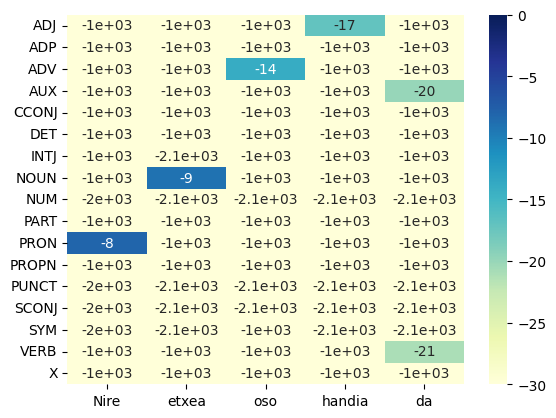

In [5]:
basque_hmm = HMM("EUS")

print("Training the model: ", basque_hmm.name)
basque_hmm.train("UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_sentence = "Nire etxea oso handia da"
viterbi = basque_hmm.pos_get_viterbi(basque_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=basque_sentence.split(), index=basque_hmm.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

Training the model:  ESP


<Axes: >

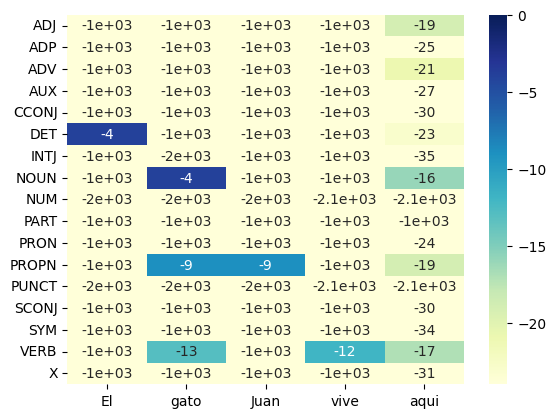

In [6]:
spanish_hmm = HMM("ESP")

print("Training the model: ", spanish_hmm.name)
spanish_hmm.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_sentence = "El gato Juan vive aqui"
viterbi = spanish_hmm.pos_get_viterbi(spanish_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=spanish_sentence.split(), index=spanish_hmm.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)